# K-means clustering

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# model 
from sklearn.cluster import KMeans   
from sklearn.preprocessing import StandardScaler 

#importing the data in features
X= df[['age', 'fare']]
X.age.fillna(value = X['age'].mean(), inplace = True)
#scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform clustering 
model = KMeans(n_clusters = 5)
model.fit(X_scaled)

C:\Users\AS\AppData\Local\Temp\ipykernel_7072\3085939122.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.age.fillna(value = X['age'].mean(), inplace = True)
C:\Users\AS\AppData\Local\Temp\ipykernel_7072\3085939122.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.age.fillna(value = X['age'].mean(), inplace = True)


KMeans(n_clusters=5)

In [7]:
X_scaled

array([[-0.53037664, -0.50244517],
       [ 0.57183099,  0.78684529],
       [-0.25482473, -0.48885426],
       ...,
       [        nan, -0.17626324],
       [-0.25482473, -0.04438104],
       [ 0.15850313, -0.49237783]])

In [5]:
X.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [3]:
df['cluster']=model.labels_

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,4
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [4]:
df['cluster'].unique()

array([3, 4, 1, 0, 2])

<function matplotlib.pyplot.show(close=None, block=None)>

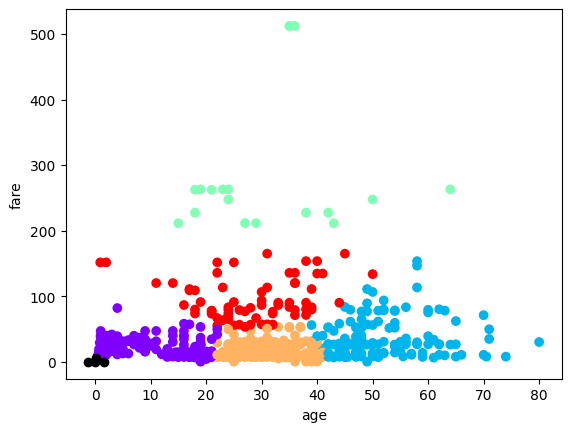

In [5]:
plt.scatter(df['age'], df['fare'], c=df['cluster'], cmap = 'rainbow')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='black')
plt.xlabel("age")
plt.ylabel('fare')
plt.show

In [6]:
import plotly.express as px
fig = px.scatter(df, x = 'age', y='fare', color = df['cluster'])
fig.show()

In [32]:
fig = px.scatter_3d(df, x = 'age', y='fare',z = 'pclass', color = df['cluster'])
fig.show()

In [7]:
df['cluster'] = df['pclass']

In [8]:
px.parallel_coordinates(df, color='cluster', title='Titanic Clusters')


In [9]:
import joblib 

In [11]:
# SAVING THE MODEL 
joblib.dump(model, 'KMeansClustering.joblib')

['KMeansClustering.joblib']

In [12]:
# load the saved model
model_loaded = joblib.load('KmeansClustering.joblib')

In [15]:
# import seaborn as sns 
df_1 = sns.load_dataset('tips')
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [16]:
df_1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [35]:
X = df_1.drop(columns = ['sex'])
y = df_1['sex']

In [18]:
X.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [19]:
y.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

In [33]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int32  
 3   smoker      244 non-null    int32  
 4   day         244 non-null    int32  
 5   time        244 non-null    int32  
 6   size        244 non-null    int64  
dtypes: float64(2), int32(4), int64(1)
memory usage: 9.7 KB


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_1['smoker'])
df_1['smoker'] = le.transform(df_1['smoker'])

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_1['day'])
df_1['day'] = le.transform(df_1['day'])

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_1['time'])
df_1['time'] = le.transform(df_1['time'])

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_1['sex'])
df_1['sex'] = le.transform(df_1['sex'])

In [36]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [37]:
joblib.dump(model, 'Tipsmodel.joblib')

['Tipsmodel.joblib']

In [38]:
model_1 = joblib.load('Tipsmodel.joblib')

In [39]:
import pickle 
# save the model 
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [40]:
# load the model 
with open('model.pkl', 'rb') as f:
    pickle.load(f)